# Step 2

In step 2 you will be using **Pytorch** to import MNIST, train a neural network on MNIST, find examples that "fool" that trained network, and, if you're a 6505 student, propose a way to deal with these examples.

## Question 1

Start by importing both the training and testing MNIST datasets using DataLoaders and the torchvision provided datasets. You can set both the training and testing batch size to be whatever you feel is best.

importing libebaries

In [133]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

Downloading and loading the data

In [134]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)

# giving name to each class
classes = ('zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine')

print(len(trainset))
print(len(testset))

60000
10000


spliting train dataset to train and validation sets

In [135]:
train_set_size = int(len(trainset) * 0.83334)
valid_set_size = len(trainset) - train_set_size
trainset, validset = torch.utils.data.random_split(trainset, [train_set_size, valid_set_size])

print('Train data set:', len(trainset))
print('Test data set:', len(testset))
print('Valid data set:', len(validset))

Train data set: 50000
Test data set: 10000
Valid data set: 10000


ploting functio for pytorch array

choosing batch size and ploting data for first batch

torch.Size([16, 1, 28, 28])
torch.Size([3, 62, 242])


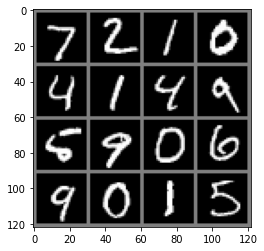

seven two   one   zero  four  one   four  nine  five  nine  zero  six   nine  zero  one   five 


In [136]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)
validloader = torch.utils.data.DataLoader(validset, batch_size=1,shuffle=False, num_workers=2)

# get some random training images
images, labels = next(iter(testloader))

# show images
print(images.shape)
print(torchvision.utils.make_grid(images).shape)

img = torchvision.utils.make_grid(images,nrow=4)
img = img / 2 + 0.5     # unnormalize
npimg = img.numpy()
npimg = np.transpose(npimg, (1, 2, 0))
plt.imshow(npimg, cmap='gray')
plt.show()
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Question 2

Define a network with the following architecture:

Conv2d (input channels=1, output channels = 15,kernel size = 5)
$\rightarrow$
MaxPool (kernel size = 2)
$\rightarrow$
ReLU
$\rightarrow$
Conv2d (input channels=15, output channels = 30,kernel size = 5)
$\rightarrow$
Dropout2d (p = 0.5)
$\rightarrow$
MaxPool (kernel size = 2)
$\rightarrow$
ReLU
$\rightarrow$
Linear(input dimension = 480, hidden units = 64)
$\rightarrow$
ReLU
$\rightarrow$
Dropout (p=0.5)
$\rightarrow$
Linear(input dimension = 64, hidden units = 10)
$\rightarrow$
LogSoftMax

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,15,5)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(15,30,5)
        self.drop1 = nn.Dropout2d(0.5)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(480, 64)
        self.drop2 = nn.Dropout2d(0.5)
        self.fc2 = nn.Linear(64, 10)
        self.soft = nn.LogSoftmax()

    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.drop1(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.drop2(F.relu(self.fc1(x)))
        x = self.soft(self.fc2(x))
        # x = F.log_softmax(self.fc2(x))
        return x


net = Net()

## Question 3

Train the network you defined in the previous question on MNIST, using the optimizer and the number of training epochs you deem appropriate. Use a cross-entropy loss. Each epoch test your model on the testing dataset and print the value of the accuracy that you achieve. Produce a plot of the loss against the number of epochs.

**Note**: Do not be overly worried about the accuracy that you achieve with your model. It should be upwards of 95% at the very least, but you won't get bonus marks for training a model that has 99.x% accuracy.

In [ ]:
import torch.optim as optim

criterion = nn.NLLLoss() # nllos
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [ ]:
print("number of batch iteration for batch size 16 is:", 50000/16)

number of batch iteration for batch size 16 is: 3125.0


In [ ]:
loss_arr = []
correct_pred = 0
total_pred = 0
for epoch in range(10):
  epoch_loss = 0.0
  for i,data in enumerate(trainloader):
    inputs , label = data
    optimizer.zero_grad()

    output = net(inputs)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()

    _, predictions = torch.max(output, 1)

    # print("labels", label, "predictions", predictions)
    for l, prediction in zip(label, predictions):
      # print("labels=", l)
      # print("prediction", prediction)
      if l == prediction:
        correct_pred += 1
      total_pred += 1


    epoch_loss = loss.item() + epoch_loss
    if i%700 == 699:
      accuracy = 100 * float(correct_pred) / total_pred
      print('epoch:', epoch , 'iteration:', i , 'loss:', epoch_loss/700, 'Train Accuracy', accuracy)
      loss_arr = np.append(loss_arr,epoch_loss)
      epoch_loss = 0 
      correct_pred = 0
      total_pred = 0
  print("*" * 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 0 iteration: 699 loss: 0.8026293381197112 Train Accuracy 73.66964285714286
epoch: 0 iteration: 1399 loss: 0.3479410889319011 Train Accuracy 89.67857142857143
epoch: 0 iteration: 2099 loss: 0.26918812115743224 Train Accuracy 91.95535714285714
epoch: 0 iteration: 2799 loss: 0.24982679990752202 Train Accuracy 92.76785714285714
****************************************************************************************************
epoch: 1 iteration: 699 loss: 0.20191708719091755 Train Accuracy 93.40243902439025
epoch: 1 iteration: 1399 loss: 0.20420738965089966 Train Accuracy 94.21428571428571
epoch: 1 iteration: 2099 loss: 0.19854877730731718 Train Accuracy 94.54464285714286
epoch: 1 iteration: 2799 loss: 0.1811096409102902 Train Accuracy 95.05357142857143
****************************************************************************************************
epoch: 2 iteration: 699 loss: 0.1771992106965211 Train Accuracy 94.6890243902439
epoch: 2 iteration: 1399 loss: 0.17087658781591536

In [ ]:
loss_arr = []
correct_pred = 0
total_pred = 0
for epoch in range(10):
  epoch_loss = 0.0
  for i,data in enumerate(trainloader):
    inputs , label = data
    optimizer.zero_grad()

    output = net(inputs)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()

    _, predictions = torch.max(output, 1)

    # print("labels", label, "predictions", predictions)
    for l, prediction in zip(label, predictions):
      # print("labels=", l)
      # print("prediction", prediction)
      if l == prediction:
        correct_pred += 1
      total_pred += 1


    epoch_loss = loss.item() + epoch_loss
    if i%700 == 699:
      accuracy = 100 * float(correct_pred) / total_pred
      print('epoch:', epoch , 'iteration:', i , 'loss:', epoch_loss, 'Train Accuracy', accuracy)
      loss_arr = np.append(loss_arr,epoch_loss)
      epoch_loss = 0 
      correct_pred = 0
      total_pred = 0
  print("*" * 100)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 0 iteration: 699 loss: 537.2056608498096 Train Accuracy 74.90178571428571
epoch: 0 iteration: 1399 loss: 238.82237886916846 Train Accuracy 90.26785714285714
epoch: 0 iteration: 2099 loss: 189.29449382983148 Train Accuracy 92.26785714285714
epoch: 0 iteration: 2799 loss: 170.35587936849333 Train Accuracy 93.01785714285714
****************************************************************************************************
epoch: 1 iteration: 699 loss: 135.21422497939784 Train Accuracy 94.0609756097561
epoch: 1 iteration: 1399 loss: 140.57143119117245 Train Accuracy 94.20535714285714
epoch: 1 iteration: 2099 loss: 133.8805945215281 Train Accuracy 94.72321428571429
epoch: 1 iteration: 2799 loss: 120.9234692917671 Train Accuracy 95.01785714285714
****************************************************************************************************
epoch: 2 iteration: 699 loss: 110.2780474947067 Train Accuracy 95.21341463414635
epoch: 2 iteration: 1399 loss: 105.92581774530117 Train Acc

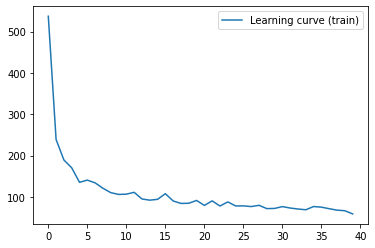

In [ ]:
plt.plot(loss_arr,label='Learning curve (train)')
plt.legend()
plt.show()

Saving the networked

In [ ]:
PATH = './cifar_net2.pth'
torch.save(net.state_dict(), PATH)

Load dataset

In [ ]:
PATH = './cifar_net2.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Test**

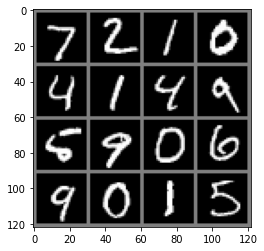

GroundTruth:  seven two   one   zero  four  one   four  nine  five  nine  zero  six   nine  zero  one   five 


In [ ]:
# visualizing 16 random sample of test dataset
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images,nrow=4))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# prepare to count predictions for each class
correct_pred = dict.fromkeys(classes, 0)
total_pred = dict.fromkeys(classes, 0)

net.eval()  # change the mode to evaluation for dropout layers

# again no gradients needed
with torch.no_grad():
    # for data in testloader:
    for i,data in enumerate(testloader):
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
total_accuracy = 0
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'class: {classname:5s} = {accuracy:.1f} %')
    total_accuracy += accuracy
print("***********total test accuracy = ", total_accuracy/10,"**************")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


class: zero  = 99.4 %
class: one   = 99.3 %
class: two   = 99.3 %
class: three = 99.3 %
class: four  = 99.6 %
class: five  = 98.9 %
class: six   = 99.2 %
class: seven = 98.5 %
class: eight = 99.1 %
class: nine  = 97.7 %
***********total test accuracy =  99.02854108810669 **************


## Question 4

### Part 1

Suppose that you have a fully trained network, and that you wanted to find images that "fooled" it, i.e., images that are misclassified by your network.

One simple approach would be to take an input image, and then alter it in the direction of ascent of the gradient of the loss w.r.t to the pixels of that input image. Mathematically:

$
\begin{equation}
x^´ = x + \epsilon \,\text{sign}\left[\nabla_x \mathcal{L(\theta,x,y}) \right]
\end{equation}
$,

where $x^´$ is the (perturbed) image you hope will fool the classifier, $x$ is the input image, $y$ is the label of the original image, $\theta$ are the network parameters, $\epsilon$ is a hyperparameter controlling the strength of the perturbation, and $\mathcal{L}$ is the loss.

Implement this in Pytorch, using the model you trained in question 3. Generate one $x'$ for all the images in the MNIST testing set, keep the $x^´$ that sucessfully fool your model, alongside their original labels and their predicted (wrong) labels, and print out the accuracy of your model in the perturbed testing set (all the $x^´$ obtained from the images in the original testing set using the equation above), for the following epsilons: $\epsilon = 0,0.05,0.15,0.25$

**Hint**: A line of code similar to "data.requires_grad = True" is needed somewhere in your solution

Loading learned model from step 3

In [ ]:
PATH = './cifar_net2.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

net.eval() # change the mode for droput out layers

Net(
  (conv1): Conv2d(1, 15, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(15, 30, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout2d(p=0.5, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=480, out_features=64, bias=True)
  (drop2): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (soft): LogSoftmax(dim=None)
)

calculating the output of both original image and its perturbed and them comparing their results for different epsilons.

In [ ]:
epsilons = [0, 0.05, 0.15, 0.25]
accuracies = []
examples = []
r_examples = []

for epsilon in epsilons:
    # Loop over all examples in test set
    correct_pred = dict.fromkeys(classes, 0)
    total_pred = dict.fromkeys(classes, 0)
    correct = 0
    fool_examples = []
    real_examples = []  # save which picture is wrong classify after fooling
    for data, target in validloader:

        data.requires_grad = True  # set gradian equal to True bacause we need them for determining the sign(grad)

        # _______________________original image input______________________
        # Forward
        output = net(data)
        original_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        loss = criterion(output, target)  # loss for original input

        net.zero_grad()                   # reset grads to zero

        loss.backward()                   # calculating grads and their signs
        grad = data.grad.data

        if original_pred.item() == target.item():  
        # ____________attack to image and predicting the output again________

            sign_grad = grad.sign()                               # finding sign of each pixel
            diff = epsilon*sign_grad
            fool_image = data + epsilon*sign_grad                 # fool the image
            fool_image = torch.clamp(fool_image, 0, 1)
            output = net(fool_image)
            perturbed_pred = output.max(1, keepdim=True)[1]       # get the index of the max log-probability

            # calculating the accuracy after attack
            if perturbed_pred.item() == target.item():
                correct += 1                                      # total accuracy
                correct_pred[classes[target.item()]] += 1         # class by class accuracy
            else:
                if len(fool_examples) < 10:                       # Save some image for step 2
                    adv_ex = fool_image.squeeze().detach().numpy()
                    fool_examples.append( (original_pred.item(), perturbed_pred.item(), adv_ex) )

                    real_img = diff.squeeze().detach().numpy()
                    real_examples.append(real_img)
            total_pred[classes[target.item()]] += 1

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(validloader))
    print("*" * 10, "Epsilon = ", epsilon, "*" * 10)
    print("total validation accuracy = ", final_acc)

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'class {classname:5s} = {accuracy:.1f} %')

    accuracies.append(final_acc)
    examples.append(fool_examples)
    r_examples.append(real_examples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


********** Epsilon =  0 **********
total validation accuracy =  0.9427
class zero  = 97.7 %
class one   = 99.8 %
class two   = 89.8 %
class three = 91.6 %
class four  = 96.0 %
class five  = 91.7 %
class six   = 93.0 %
class seven = 95.8 %
class eight = 99.3 %
class nine  = 94.6 %
********** Epsilon =  0.05 **********
total validation accuracy =  0.9122
class zero  = 96.4 %
class one   = 99.3 %
class two   = 84.3 %
class three = 87.9 %
class four  = 91.8 %
class five  = 88.7 %
class six   = 88.3 %
class seven = 93.8 %
class eight = 98.4 %
class nine  = 89.8 %
********** Epsilon =  0.15 **********
total validation accuracy =  0.8125
class zero  = 90.4 %
class one   = 97.4 %
class two   = 68.6 %
class three = 76.4 %
class four  = 78.4 %
class five  = 79.3 %
class six   = 71.4 %
class seven = 87.7 %
class eight = 96.2 %
class nine  = 71.8 %
********** Epsilon =  0.25 **********
total validation accuracy =  0.6331
class zero  = 80.7 %
class one   = 95.1 %
class two   = 46.7 %
class three = 

### Part 2

Show some of the images that fooled your network in part 1 (plt.imshow will come in handy), making sure to include both what their original and perturbed labels were in the title of your plot. Does it make sense to you that these images are fooling your network? Why or why not?

ploting and comparing the results

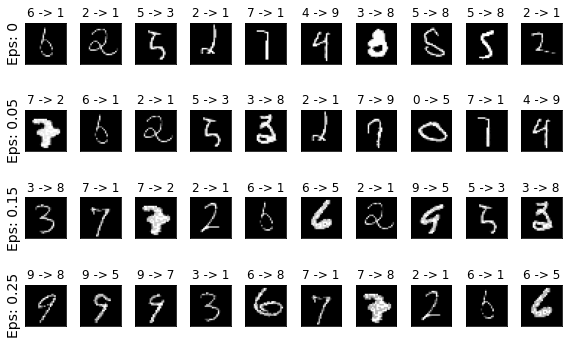

In [ ]:
cnt = 0
plt.figure(figsize=(8,5))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex, cmap="gray")

plt.tight_layout()
plt.show()

Although deep learning and neural networks solved many problems in image processing, sound, etc. However, they are so vulnerable to perturbations, and their performance change dramatically. like in this question after attacking the network by leveraging into gradients, we observed a significant reduction in model accuracy. 
So, we plot the images that are classified in the wrong class after attack. As you can see above no disaster happened to images and numbers are still looks so good for classification purpose, only in epsilon equal to 0.25, we can observe some noise in the pictures. like some gray pixel in the middle of "7".  Also, in e=0.15 sixth column number "6" which was classified correctly at the beginning, has a wrong label "5" after the attack. and this number "6" doesn't have any similarity to "5". Moreover, it seems that this was a targeted attack because the reduction in accuracy among the classes is not uniform. So the accuracy for some classes is less than others. like "9", "2", and "6".

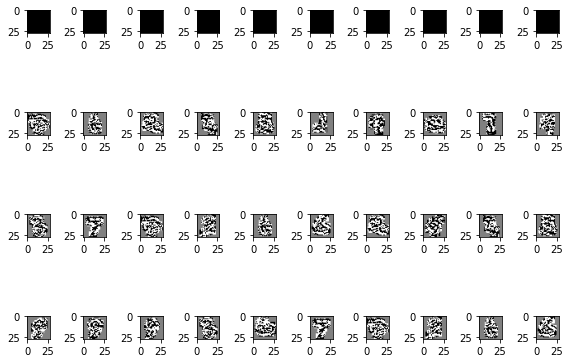

In [ ]:
cnt = 0
plt.figure(figsize=(8,6))
for i in range(len(epsilons)):
    diff = []
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        ex = r_examples[i][j]
        plt.imshow(ex, cmap="gray")

plt.tight_layout()
plt.show()

In the next step, since I wasn't able to decide based on my own eye and changes weren't so obvious, I plot the error and perturbed amount that applied to each picture. As you can see above, although changes are not visible by naked eyes, in fact, many perturbations are added to the pictures which result in misclassification. In the next step, we will try to improve the perfomance of model in this setuation and make the model more robust.

## Question 5 (6505 only)

Can you think of a way to make your network more robust to these perturbed images? Does your proposal have drawbacks? Run any experiments you feel are needed to prove your claims.

**Note**: You are not expected to find a perfect solution, just something that makes sense and has some evidence backing it up. You will be marked on the persuasiveness of your argument/experiments and how much sense your proposal makes, not the overall improvements in robustness you achieve (however, if your proposal worsens the problem, then that's a pretty solid hint you're going in the wrong direction).

# **answer**

# step1

In order to solve the problem. First thing that came to my mind was morphological transformations which are some simple operations based on the image shape. With aim of these methods we can reduce the background noise and forground noise seperatly, like "oppening" morphology. But when I applied this method, model performance didn't get better. So, I decided to add some perturbute image to my train dataset. As a result model will learn perturbates and become more robust. Therefore, each batch data with 20% probability will change to a fool image with epsilon equal to 0.1. 

In [ ]:
import cv2 as cv # for morphology filter
import numpy as np
from random import random

kernel = np.ones((5,5),np.uint8)
# opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

loss_arr = []
correct_pred = 0
total_pred = 0
for epoch in range(10):
  epoch_loss = 0.0
  grad = 0
  for i,data in enumerate(trainloader):

    inputs , label = data

    if random() < 0.2 and i>0:
      sign_grad = grad.sign()                               # finding sign of each pixel
      diff = 0.1*sign_grad
      inputs = inputs + 0.1*sign_grad                 # fool the image
      inputs = torch.clamp(inputs, 0, 1)
    
    # inputs = inputs.numpy()
    # # print (len(inputs))
    # for k in range(len(inputs)):
    #   inputs[k] = cv.morphologyEx(inputs[k], cv.MORPH_OPEN, kernel)
    # inputs = torch.from_numpy(inputs)
    
    inputs.requires_grad = True
    optimizer.zero_grad()

    output = net(inputs)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()
    grad = inputs.grad.data

    _, predictions = torch.max(output, 1)

    # print("labels", label, "predictions", predictions)
    for l, prediction in zip(label, predictions):
      # print("labels=", l)
      # print("prediction", prediction)
      if l == prediction:
        correct_pred += 1
      total_pred += 1


    epoch_loss = loss.item() + epoch_loss
    if i%700 == 699:
      accuracy = 100 * float(correct_pred) / total_pred
      print('epoch:', epoch , 'iteration:', i , 'loss:', epoch_loss, 'Train Accuracy', accuracy)
      loss_arr = np.append(loss_arr,epoch_loss)
      epoch_loss = 0 
      correct_pred = 0
      total_pred = 0
  print("*" * 100)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 0 iteration: 699 loss: 535.2851855270565 Train Accuracy 75.67857142857143
epoch: 0 iteration: 1399 loss: 243.4743940550834 Train Accuracy 89.71428571428571
epoch: 0 iteration: 2099 loss: 199.71704053599387 Train Accuracy 91.65178571428571
epoch: 0 iteration: 2799 loss: 165.93919907556847 Train Accuracy 93.19642857142857
****************************************************************************************************
epoch: 1 iteration: 699 loss: 150.31937470671255 Train Accuracy 93.5
epoch: 1 iteration: 1399 loss: 138.70265895233024 Train Accuracy 94.26785714285714
epoch: 1 iteration: 2099 loss: 130.77833273645956 Train Accuracy 94.69642857142857
epoch: 1 iteration: 2799 loss: 140.6329229969997 Train Accuracy 94.57142857142857
****************************************************************************************************
epoch: 2 iteration: 699 loss: 114.25326501904055 Train Accuracy 95.10365853658537
epoch: 2 iteration: 1399 loss: 125.66245860618073 Train Accuracy 94.83

**plot the learning curve and save the model** 

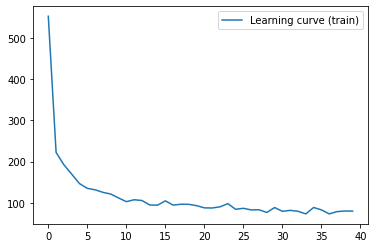

In [ ]:
plt.plot(loss_arr,label='Learning curve (train)')
plt.legend()
plt.show()

In [ ]:
PATH = './cifar_net_learnig_attack.pth'
torch.save(net.state_dict(), PATH)

# step2

As you can see model accuracy after adding fool images to the training dataset is 96.68. in the following, I repeat Q4 on this new model and will study the results.

In [ ]:
epsilons = [0, 0.05, 0.15, 0.25]
accuracies = []
examples = []
r_examples = []

for epsilon in epsilons:
    # Loop over all examples in test set
    correct_pred = dict.fromkeys(classes, 0)
    total_pred = dict.fromkeys(classes, 0)
    correct = 0
    fool_examples = []
    real_examples = []  # save which picture is wrong classify after fooling
    for data, target in validloader:

        data.requires_grad = True  # set gradian equal to True bacause we need them for determining the sign(grad)

        # _______________________original image input______________________
        # Forward
        output = net(data)
        original_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        loss = criterion(output, target)  # loss for original input

        net.zero_grad()                   # reset grads to zero

        loss.backward()                   # calculating grads and their signs
        grad = data.grad.data

        if original_pred.item() == target.item():  
        # ____________attack to image and predicting the output again________

            sign_grad = grad.sign()                               # finding sign of each pixel
            diff = epsilon*sign_grad
            fool_image = data + epsilon*sign_grad                 # fool the image
            fool_image = torch.clamp(fool_image, 0, 1)
            output = net(fool_image)
            perturbed_pred = output.max(1, keepdim=True)[1]       # get the index of the max log-probability

            # calculating the accuracy after attack
            if perturbed_pred.item() == target.item():
                correct += 1                                      # total accuracy
                correct_pred[classes[target.item()]] += 1         # class by class accuracy
            else:
                if len(fool_examples) < 10:                       # Save some image for step 2
                    adv_ex = fool_image.squeeze().detach().numpy()
                    fool_examples.append( (original_pred.item(), perturbed_pred.item(), adv_ex) )

                    real_img = diff.squeeze().detach().numpy()
                    real_examples.append(real_img)
            total_pred[classes[target.item()]] += 1

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(validloader))
    print("*" * 10, "Epsilon = ", epsilon, "*" * 10)
    print("total validation accuracy = ", final_acc)

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'class {classname:5s} = {accuracy:.1f} %')

    accuracies.append(final_acc)
    examples.append(fool_examples)
    r_examples.append(real_examples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


********** Epsilon =  0 **********
total validation accuracy =  0.9372
class zero  = 98.2 %
class one   = 97.1 %
class two   = 98.8 %
class three = 98.3 %
class four  = 95.3 %
class five  = 96.5 %
class six   = 97.8 %
class seven = 97.8 %
class eight = 94.6 %
class nine  = 95.3 %
********** Epsilon =  0.05 **********
total validation accuracy =  0.9315
class zero  = 97.1 %
class one   = 96.6 %
class two   = 96.6 %
class three = 98.0 %
class four  = 93.1 %
class five  = 96.6 %
class six   = 97.8 %
class seven = 98.2 %
class eight = 92.9 %
class nine  = 94.7 %
********** Epsilon =  0.15 **********
total validation accuracy =  0.9005
class zero  = 95.6 %
class one   = 93.3 %
class two   = 95.7 %
class three = 96.1 %
class four  = 87.8 %
class five  = 94.7 %
class six   = 94.8 %
class seven = 96.4 %
class eight = 86.8 %
class nine  = 87.9 %
********** Epsilon =  0.25 **********
total validation accuracy =  0.8365
class zero  = 90.9 %
class one   = 88.5 %
class two   = 91.0 %
class three = 

# Result for step 1 and 2

By comparing the results and accuracy with step 4, you can see that for epsilon = 0.05, 0.15, and 0.25 the model accuracy increased from 91 to 93, 81 to 90, and 63 to 83 respectively.

In a conclusion, feeding fool image to train model results in more robustness. 

# After soft deadline steps

# step 3

In step 1 and 2 I added fool image to my dataset for training. However, this technic only make the model robust to an special kind of attack. We need some methods to generalized the model and make it robust against some attacks.

To this end, there is two different approach:

1) change the model property and train completely a new one.

2) keep our previous model and try to manage the input data and make it smoother for the model.

Since I've already done the first approach. I will try a denoising method on my dataset and then feed it to the network.

for image denoising and making the model robust, we can try RBF activations, data augmentation, and autoencoders. Between these methods I choose AE denoising. AE are very power ful thechnics, which learn a new representation of data and only capture the most important information in the data that help them in reconstructing the input. Moreover, it gives me the opportunity to improve my accuracy and prediction when data is fooled and attacked without changing the main model and network.

In the following, since data that we have is image, I trained convolutional AE with MNIST dataset.

encoder and decoder sturcture will be completely semetric. Also, during traing phase, instead of using MNIST labels we will use input as target again.

In [137]:
class View(nn.Module):
    def __init__(self, *shape):
        super(View, self).__init__()
        self.shape = shape
    def forward(self, input):
        return input.view(*self.shape) 


encoder_conv = nn.Sequential(
    View(-1,1,28,28),
    nn.Conv2d(1, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1) 
)


decoder_conv = nn.Sequential(
    nn.Conv2d(2, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 1, (3,3),padding=1)
)

autoencoder_net = nn.Sequential(
    encoder_conv,
    decoder_conv
)

mse_loss = nn.MSELoss()

optimizer = torch.optim.AdamW(autoencoder_net.parameters())

In [139]:
import numpy as np

loss_arr = []
correct_pred = 0
total_pred = 0

for epoch in range(10):
  epoch_loss = 0.0
  grad = 0

  for i,data in enumerate(trainloader):
  
    inputs , label = data
    label = inputs
    
    inputs.requires_grad = True
    optimizer.zero_grad()

    output = autoencoder_net(inputs)
    # print(output.shape)
    # print(label.shape)
    loss = mse_loss(output, label)
    loss.backward()
    optimizer.step()
    grad = inputs.grad.data

    epoch_loss = loss.item() + epoch_loss
    # if i%100 == 99:
    if i%700 == 699:
      print('epoch:', epoch , 'iteration:', i , 'loss:', epoch_loss)
      loss_arr = np.append(loss_arr,epoch_loss)
      epoch_loss = 0 
      correct_pred = 0
      total_pred = 0

  print("*" * 100)



epoch: 0 iteration: 699 loss: 10.60916524194181
epoch: 0 iteration: 1399 loss: 5.3362990617752075
epoch: 0 iteration: 2099 loss: 2.954505261965096
epoch: 0 iteration: 2799 loss: 1.8606305717257783
****************************************************************************************************
epoch: 1 iteration: 699 loss: 1.399376728280913
epoch: 1 iteration: 1399 loss: 1.2379222986055538
epoch: 1 iteration: 2099 loss: 1.0427252486115322
epoch: 1 iteration: 2799 loss: 0.9296874803549144
****************************************************************************************************
epoch: 2 iteration: 699 loss: 0.7940918292733841
epoch: 2 iteration: 1399 loss: 0.8727471059537493
epoch: 2 iteration: 2099 loss: 0.8004333602148108
epoch: 2 iteration: 2799 loss: 0.8302547687926563
****************************************************************************************************
epoch: 3 iteration: 699 loss: 0.7472717969212681
epoch: 3 iteration: 1399 loss: 0.686953440803336
epoch

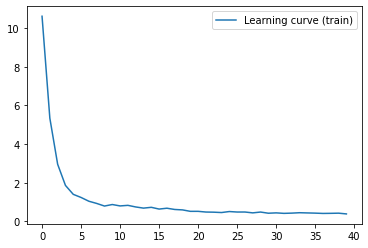

In [143]:
plt.plot(loss_arr,label='Learning curve (train)')
plt.legend()
plt.show()

PATH = './cifar_net_AE_denoising.pth'
torch.save(net.state_dict(), PATH)

# Testing denoising AE

in the following I plot 2 different pictures. 

in the first row, I gave a clean MNIST image (left pic) to my AE and you can see that the output is the same and AE can reconstruct it perfectly (right pic).

In the second row, I added normal noise (mean = 0 and var=0.1) to the same picture (row2 col1) and in the right of it you can see the output and results of autoencoder that removed the noise of picture.

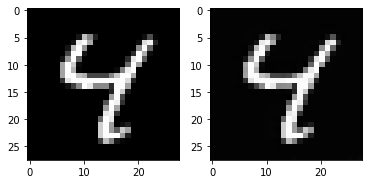

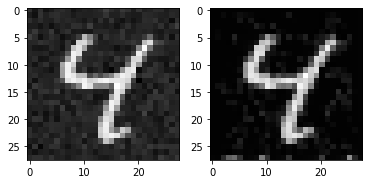

In [145]:
from torch.utils.data.dataset import TensorDataset
from random import random

normal = torch.distributions.Normal(0, 0.1)

def showEncodeDecode(encode_decode, x):
    encode_decode = encode_decode
    with torch.no_grad():
        x_recon = encode_decode(x)

    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(x.numpy()[0,:], cmap='gray')
    axarr[1].imshow(x_recon.numpy()[0,0,:], cmap='gray')

showEncodeDecode(autoencoder_net, testset[6][0])
showEncodeDecode(autoencoder_net, testset[6][0] + normal.sample(sample_shape=torch.Size(testset[6][0].shape)))

# Step 4

In step for I repeated Q4 validation part. I used first model that I trained, the one that simply trained only with MNIST dataset.

the main change is happening before giving the data to the model, so before giving data (fooled and attacky data) I give them to trained AE, denosing them and then feed them to the main model.

in the following you can see the results:

**normal model:**

epsilon = 0     ==> accuracy = 93

epsilon = 0.05  ==> accuracy = 91

epsilon = 0.15  ==> accuracy = 81

epsilon = 0.25  ==> accuracy = 63

**AE + normal model:**

epsilon = 0     ==> accuracy = 93

epsilon = 0.05  ==> accuracy = 91

epsilon = 0.15  ==> accuracy = 87

epsilon = 0.25  ==> accuracy = 80

As you can see the performace increased.

In [ ]:
epsilons = [0, 0.05, 0.15, 0.25]
accuracies = []
examples = []
r_examples = []

for epsilon in epsilons:
    # Loop over all examples in test set
    correct_pred = dict.fromkeys(classes, 0)
    total_pred = dict.fromkeys(classes, 0)
    correct = 0
    fool_examples = []
    real_examples = []  # save which picture is wrong classify after fooling
    for data, target in validloader:

        data.requires_grad = True  # set gradian equal to True bacause we need them for determining the sign(grad)

        # _______________________original image input______________________
        # Forward
        output = net(data)
        original_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        loss = criterion(output, target)  # loss for original input

        net.zero_grad()                   # reset grads to zero

        loss.backward()                   # calculating grads and their signs
        grad = data.grad.data

        if original_pred.item() == target.item():  
        # ____________attack to image and predicting the output again________

            sign_grad = grad.sign()                               # finding sign of each pixel
            diff = epsilon*sign_grad
            fool_image = data + epsilon*sign_grad                 # fool the image
            fool_image = torch.clamp(fool_image, 0, 1)
            fool_image = autoencoder_net(fool_image)
            output = net(fool_image)
            perturbed_pred = output.max(1, keepdim=True)[1]       # get the index of the max log-probability

            # calculating the accuracy after attack
            if perturbed_pred.item() == target.item():
                correct += 1                                      # total accuracy
                correct_pred[classes[target.item()]] += 1         # class by class accuracy
            else:
                if len(fool_examples) < 10:                       # Save some image for step 2
                    adv_ex = fool_image.squeeze().detach().numpy()
                    fool_examples.append( (original_pred.item(), perturbed_pred.item(), adv_ex) )

                    real_img = diff.squeeze().detach().numpy()
                    real_examples.append(real_img)
            total_pred[classes[target.item()]] += 1

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(validloader))
    print("*" * 10, "Epsilon = ", epsilon, "*" * 10)
    print("total validation accuracy = ", final_acc)

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'class {classname:5s} = {accuracy:.1f} %')

    accuracies.append(final_acc)
    examples.append(fool_examples)
    r_examples.append(real_examples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


********** Epsilon =  0 **********
total validation accuracy =  0.9348
class zero  = 94.9 %
class one   = 97.5 %
class two   = 89.3 %
class three = 92.2 %
class four  = 95.4 %
class five  = 94.6 %
class six   = 91.6 %
class seven = 95.3 %
class eight = 98.5 %
class nine  = 93.5 %
********** Epsilon =  0.05 **********
total validation accuracy =  0.9183
class zero  = 93.4 %
class one   = 96.3 %
class two   = 85.9 %
class three = 89.7 %
class four  = 94.2 %
class five  = 93.2 %
class six   = 89.3 %
class seven = 94.7 %
class eight = 98.0 %
class nine  = 91.4 %
********** Epsilon =  0.15 **********
total validation accuracy =  0.87
class zero  = 89.7 %
class one   = 93.9 %
class two   = 76.7 %
class three = 82.5 %
class four  = 87.8 %
class five  = 89.7 %
class six   = 83.2 %
class seven = 91.9 %
class eight = 96.6 %
class nine  = 85.7 %
********** Epsilon =  0.25 **********
total validation accuracy =  0.806
class zero  = 84.6 %
class one   = 91.0 %
class two   = 65.3 %
class three = 74.

# Step 5

If you compare the results of step 1 and 2 with step 3 and 4 you can see that both of them improved the model. So, I decide to combine these two approach. To this end, I used and reload the model that I trained with 20% fooled image added to the train dataset (model from step 1 and 2). Then, at the validation part, at first I denoise the images and then feed them to the model.

In the following you can see that the results are significantly improved:

epsilon = 0     ==> accuracy = 98

epsilon = 0.05  ==> accuracy = 97

epsilon = 0.15  ==> accuracy = 95

epsilon = 0.25  ==> accuracy = 91

In [ ]:
PATH = './cifar_net_learnig_attack.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

net.eval() # change the mode for droput out layers

Net(
  (conv1): Conv2d(1, 15, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(15, 30, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout2d(p=0.5, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=480, out_features=64, bias=True)
  (drop2): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (soft): LogSoftmax(dim=None)
)

In [ ]:
epsilons = [0, 0.05, 0.15, 0.25]
accuracies = []
examples = []
r_examples = []

for epsilon in epsilons:
    # Loop over all examples in test set
    correct_pred = dict.fromkeys(classes, 0)
    total_pred = dict.fromkeys(classes, 0)
    correct = 0
    fool_examples = []
    real_examples = []  # save which picture is wrong classify after fooling
    for data, target in validloader:

        data.requires_grad = True  # set gradian equal to True bacause we need them for determining the sign(grad)

        # _______________________original image input______________________
        # Forward
        output = net(data)
        original_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        loss = criterion(output, target)  # loss for original input

        net.zero_grad()                   # reset grads to zero

        loss.backward()                   # calculating grads and their signs
        grad = data.grad.data

        if original_pred.item() == target.item():  
        # ____________attack to image and predicting the output again________

            sign_grad = grad.sign()                               # finding sign of each pixel
            diff = epsilon*sign_grad
            fool_image = data + epsilon*sign_grad                 # fool the image
            fool_image = torch.clamp(fool_image, 0, 1)
            fool_image = autoencoder_net(fool_image)
            output = net(fool_image)
            perturbed_pred = output.max(1, keepdim=True)[1]       # get the index of the max log-probability

            # calculating the accuracy after attack
            if perturbed_pred.item() == target.item():
                correct += 1                                      # total accuracy
                correct_pred[classes[target.item()]] += 1         # class by class accuracy
            else:
                if len(fool_examples) < 10:                       # Save some image for step 2
                    adv_ex = fool_image.squeeze().detach().numpy()
                    fool_examples.append( (original_pred.item(), perturbed_pred.item(), adv_ex) )

                    real_img = diff.squeeze().detach().numpy()
                    real_examples.append(real_img)
            total_pred[classes[target.item()]] += 1

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(validloader))
    print("*" * 10, "Epsilon = ", epsilon, "*" * 10)
    print("total validation accuracy = ", final_acc)

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'class {classname:5s} = {accuracy:.1f} %')

    accuracies.append(final_acc)
    examples.append(fool_examples)
    r_examples.append(real_examples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


********** Epsilon =  0 **********
total validation accuracy =  0.9801
class zero  = 99.8 %
class one   = 99.7 %
class two   = 99.4 %
class three = 99.5 %
class four  = 99.8 %
class five  = 98.7 %
class six   = 99.4 %
class seven = 99.4 %
class eight = 99.3 %
class nine  = 99.9 %
********** Epsilon =  0.05 **********
total validation accuracy =  0.9749
class zero  = 99.5 %
class one   = 99.5 %
class two   = 98.7 %
class three = 98.9 %
class four  = 99.2 %
class five  = 98.3 %
class six   = 98.9 %
class seven = 99.0 %
class eight = 98.0 %
class nine  = 99.5 %
********** Epsilon =  0.15 **********
total validation accuracy =  0.9522
class zero  = 98.2 %
class one   = 98.8 %
class two   = 95.1 %
class three = 97.7 %
class four  = 96.5 %
class five  = 95.3 %
class six   = 96.3 %
class seven = 97.5 %
class eight = 93.5 %
class nine  = 97.3 %
********** Epsilon =  0.25 **********
total validation accuracy =  0.9142
class zero  = 96.1 %
class one   = 97.6 %
class two   = 90.1 %
class three = 

# Conclusion for last question:

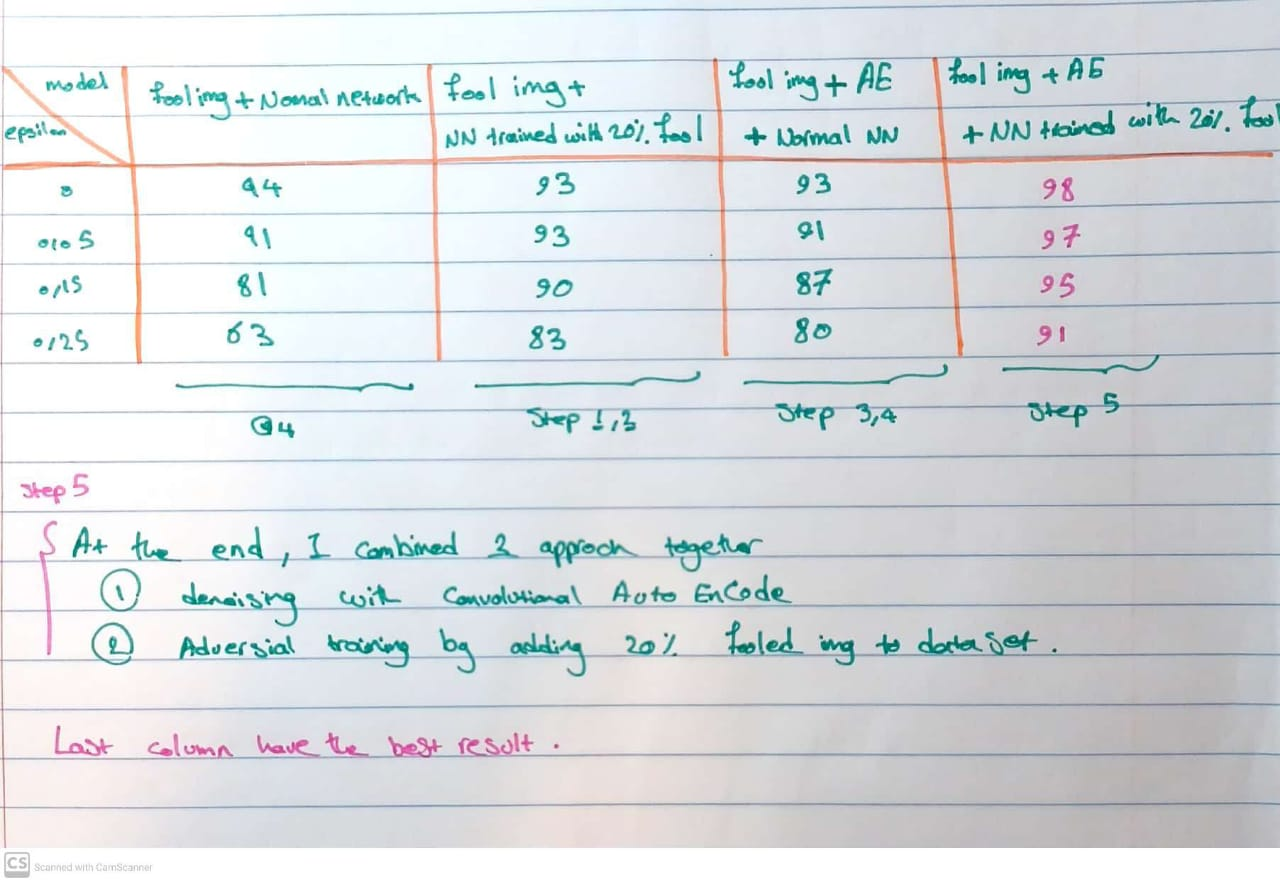